# Определение перспективного тарифа для телеком-компании

# Описание проекта.

Цель проекта: определить наиболее выгодный для компании тариф.

Задачи проекта:
1. Проанализировать поведение клиентов.
2. Определить доходность каждого тарифа.
3. Определить уровень доходности тарифов в географическом аспекте (Москва и регионы)

Источники данных:
Пять таблиц, содержащих информацию о клиентах и характере пользования услугами, предоставляемыми в рамках каждого тарифа, а также характеристики самих тарифов.

Характер данных: выборка данных о 500 пользователях и их активности за 2018 год.

Структура проекта:
1. [Изучение данных.](#start)
2. [Предобработка данных.](#data_preparation)
3. [Анализ данных.](#analysis)
4. [Проверка гипотез](#hypothesis_testing)
5. [Общий вывод.](#outcome)

## Изучение данных.<a id="start"></a>

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
from datetime import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
calls = pd.read_csv('C:/datasets/calls.csv')
internet = pd.read_csv('C:/datasets/internet.csv')
messages = pd.read_csv('C:/datasets/messages.csv')
tariffs = pd.read_csv('C:/datasets/tariffs.csv')
users = pd.read_csv('C:/datasets/users.csv')

In [3]:
display(calls.head(10))
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
#Округляем длительность звонуков в минуту в бОльшую сторону
calls['duration'] = np.ceil(calls['duration'])
display(calls)


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


In [5]:
#Определяем количество клиентов, пользующихся услугой
calls.user_id.unique().shape

(492,)

Восемь человек вообще не делали звонков за весь период.

In [6]:
display(internet)
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
#Определяем количество клиентов, пользующихся услугой
internet.user_id.unique().shape

(497,)

Три человека не пользовались интернетом.

In [8]:
display(messages)
messages.info()
 

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
#Определяем количество клиентов, пользующихся услугой
messages.user_id.unique().shape

(426,)

74 человека не пользовались смс.

In [10]:
display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
display(users)
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Проверяем данные на наличие клиентов, которые вообще не пользовались услугами, предоставляемыми компанией.

In [12]:
def gone_customers (table_1, table_2, col_1, col_2):
    test_table = table_1.merge(table_2, on = col_1, how = 'left').groupby(col_1)[col_2].count().reset_index()
    result_table = test_table[test_table[col_2] == 0]

    return result_table


In [13]:
#Выявляем тех, кто не звонил.
not_using_calls = gone_customers (users, calls, 'user_id', 'duration')
not_using_calls

,user_id,duration
91,1091,0
106,1106,0
128,1128,0
231,1231,0
328,1328,0
371,1371,0
473,1473,0
489,1489,0


In [14]:
#Выявляем тех, кто не пользовался интернетом.
not_using_internet = gone_customers (users, internet, 'user_id', 'mb_used')
not_using_internet

,user_id,mb_used
128,1128,0
273,1273,0
371,1371,0


In [15]:
#Выявляем тех, кто не пользовался смс.
not_using_messages = gone_customers (users, messages, 'user_id', 'id')
not_using_messages

,user_id,id
1,1001,0
6,1006,0
10,1010,0
17,1017,0
24,1024,0
...,...,...
462,1462,0
466,1466,0
469,1469,0
479,1479,0


In [16]:
#Выявляем тех, кто не пользовался ни одной услугой компании
missed_clients = not_using_internet.merge(not_using_calls, on = 'user_id', how = 'left')
missed_clients_2 = missed_clients.merge(not_using_messages, on = 'user_id', how = 'left')
missed_clients_2

,user_id,mb_used,duration,id
0,1128,0,0.0,0.0
1,1273,0,NaN,NaN
2,1371,0,0.0,0.0


Два клиента точно не пользовались никакими услугами компании.

## Предобработка данных.<a id="data_preparation"></a>

### Приводим данные к нужным типам

In [17]:
#Приводим данные к нужным типам в таблице calls
calls['id'] = calls['id'].astype(int)
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int32         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 5.4 MB


In [18]:
#Приводим данные к нужным типам в таблице internet
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
internet.info()
display(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [19]:
#Приводим данные к нужным типам в таблице messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
messages['id'] = messages['id'].astype(int)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int32         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 2.3 MB


In [20]:
#Приводим данные к нужным типам в таблице users
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Убираем ошибки в данных.

In [21]:
#Убираем колонку 'Unnamed: 0', которая дублирует индексы в таблице internet
internet.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


19598

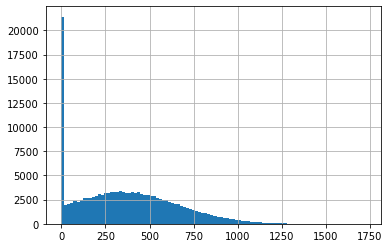

In [22]:
#Проверяем данные на нулевые значения.
internet['mb_used'].hist(bins = 100)
display(internet)
display(internet[internet['mb_used'] == 0]['session_date'].count())

Гистограмма показывает не менее 21000 сессий (при 100 корзинах в гистограмме), когда за сессию было потрачено 0 Мб. Такие сессии невозможны. Это либо ошибка при загрузке данных либо ошибка при внесении данных в таблицу. Согласно гистограмме таких эпизодов больше 21000 или более 14.05% от общей массы. При подсчёте с помощью логической индексации получается всего 19598 эпизодов или 13.11% от общей массы. Причиной такого различия является, очевидно, тот факт, что в первый столбец гистограммы попадает и часть значений около нуля.
    При получении помесячного трафика каждого абонента мы получим один и тот же объём трафика, вне зависимости от того, будем ли мы пренебрегать нулевыми значениями или удалим их. Вычисление среднего трафика мы делаем на основе суммы помесячных значений а не на основе суммы сессий.
    Значения итогового дохода от каждого интернет-пользователя в случае удаления нулей так же не изменятся.
    Следовательно, хотя получившаяся доля аномальных значений велика, делать с ней что-то нет необходимости.

### Проверяем данные на наличие пропусков

In [23]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [24]:
internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [25]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [26]:
tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [27]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Пропуски есть только в колонке churn_date таблицы users. Это, по-видимому, отсутствующие даты, свидетельствующие о том, что 462 клиента продолжают пользоваться тарифом.

### Проверяем данные на наличие дубликатов.

In [28]:
calls.duplicated().sum()

0

In [29]:
internet.duplicated().sum()

0

In [30]:
messages.duplicated().sum()

0

In [31]:
tariffs.duplicated().sum()

0

In [32]:
users.duplicated().sum()

0

### Проверяем значение в колонках first_name, last_name, city таблицы users на наличие скрытых дубликатов

In [33]:
users['first_name'].unique()
users['last_name'].unique()
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Ни в одной из таблиц нет пропущенных данных, кроме колонки churn_date таблицы users. В этом случае отсутствующие даты свидетельствующт о том, что 462 клиента продолжают пользоваться тарифом. Дублирующихся строк так же нет ни в одной таблице.
Единственная ошибка в данных, которая была обнаружена - дублирующая индексацию колонка 'Unnamed: 0' таблицы internet. Эта колонка была удалена. Скрытых дубликатов в именах, фамилиях и названиях городов нет.

### Добавляем в таблицы столбцы с названием месяца.

In [34]:
#добавляем столбец с названием месяца в таблицу calls.
#Группируем, чтобы получить количество звонков и их продолжительность для каждого клиента помесячно.
calls['months'] = calls['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'months']).agg({
  'duration': 'sum',
  'call_date': 'count'
}).reset_index()
calls_monthly.rename(columns = {'call_date': 'call_number'}, inplace = True)
display(calls_monthly)

,user_id,months,duration,call_number
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


In [35]:
#добавляем столбец с названием месяца в таблицу internet.
#Группируем, чтобы получить объём трафика для каждого клиента помесячно.
internet['months'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id', 'months']).agg({
  'mb_used': 'sum'
}).reset_index()

internet_monthly.info()
internet_monthly.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3203 non-null   int64  
 1   months   3203 non-null   int64  
 2   mb_used  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


,user_id,months,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


In [36]:
#добавляем столбец с названием месяца в таблицу internet.
#Группируем, чтобы получить количество смс для каждого клиента помесячно.
messages['months'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id', 'months']).agg({
  'message_date': 'count'
}).reset_index()
messages_monthly.rename(columns = {'message_date': 'message_number'}, inplace = True)
messages_monthly.head(60)

,user_id,months,message_number
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [37]:
#Объединяем таблицы, полученный в результате группировки.
result_table = calls_monthly.merge(internet_monthly, on = ['months', 'user_id'], how = 'outer')
result_table = result_table.merge(messages_monthly, on = ['months', 'user_id'], how = 'outer')
#display(result_table.head(10))
result_table_users = result_table.merge(users, on = 'user_id', how = 'left')
tariffs.rename(columns = {'tariff_name': 'tariff'}, inplace = True)
result_table_tariffs = result_table_users.merge(tariffs, on = 'tariff', how = 'left')

#При создании итоговой таблицы в колонках с количеством использованных смс помесячно возникли значения NAN,
#поскольку часть пользователей не пользовалась смс. Заменяем все значения NAN на 0.
#В порядке контроля делаем это же в других колонках.
result_table_tariffs[['duration', 'call_number', 'mb_used', 'message_number']] = result_table_tariffs[['duration', 'call_number', 'mb_used', 'message_number']].fillna(0)

#Переводим измерение трафика в гигабайты и округляем использованный трафик помесячно в бОльшую сторону.
result_table_tariffs['mb_per_month_included'] = result_table_tariffs['mb_per_month_included'] / 1024
result_table_tariffs['mb_used'] = (result_table_tariffs['mb_used'] / 1024).apply(np.ceil)
display(result_table_tariffs.head())
result_table_tariffs.info()
result_table_tariffs.user_id.unique().shape 

,user_id,months,duration,call_number,mb_used,message_number,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,3.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1,1000,6,172.0,43.0,23.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
2,1000,7,340.0,47.0,14.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
3,1000,8,408.0,52.0,14.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
4,1000,9,466.0,58.0,15.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   months                 3214 non-null   int64         
 2   duration               3214 non-null   float64       
 3   call_number            3214 non-null   float64       
 4   mb_used                3214 non-null   float64       
 5   message_number         3214 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

(498,)

В таблице 498 user_id, тогда как в таблице users их 500. Два клиента, как мы выяснили выше, (user_id - 1128 и 1371) не воспользовались ни одной из трёх услуг, их нет в объединённой таблице.

In [38]:
#переименовываю колонку с интернет-трафиком.
result_table_tariffs.rename(columns = {'mb_used' : 'gb_used', 'mb_per_month_included':'gb_per_month_included'}, inplace = True)

#Создаём функцию для расчёта месячного дохода от каждого клиента
def monthly_revenue(tarif, used, granted, extra):
    return (used - granted) * extra 

#В цикле рассчитываем доходы от каждого клиента по видам услуг: продолжительность звонков, количество смс,
#объём использованного трафика в месяц.

for i in list(range(0, len(result_table_tariffs))):
    tarif = result_table_tariffs.rub_monthly_fee[i]
    used_minutes = result_table_tariffs.duration[i]
    used_messages = result_table_tariffs.message_number[i]
    used_gb = result_table_tariffs.gb_used[i]
    granted_minutes = result_table_tariffs.minutes_included[i]
    granted_messages = result_table_tariffs.messages_included[i]
    granted_gb = result_table_tariffs.gb_per_month_included[i]
    extra_minutes = result_table_tariffs.rub_per_minute[i]
    extra_messages = result_table_tariffs.rub_per_message[i]
    extra_gb = result_table_tariffs.rub_per_gb[i]
    
    if result_table_tariffs.duration[i] > result_table_tariffs.minutes_included[i]:
        tarif += monthly_revenue(tarif, used_minutes, granted_minutes, extra_minutes)
    
    if result_table_tariffs.message_number[i] > result_table_tariffs.messages_included[i]:
        tarif += monthly_revenue(tarif, used_messages, granted_messages, extra_messages)
        
    if result_table_tariffs.gb_used[i] > result_table_tariffs.gb_per_month_included[i]:
        tarif += monthly_revenue(tarif, used_gb, granted_gb, extra_gb)

    result_table_tariffs.loc[i, 'monthly_revenue'] = tarif


display(result_table_tariffs.head(10))
     


,user_id,months,duration,call_number,gb_used,message_number,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000,5,159.0,22.0,3.0,22.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,6,172.0,43.0,23.0,60.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,7,340.0,47.0,14.0,75.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,8,408.0,52.0,14.0,81.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,9,466.0,58.0,15.0,57.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
5,1000,10,350.0,57.0,15.0,73.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
6,1000,11,338.0,43.0,15.0,58.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
7,1000,12,333.0,46.0,10.0,70.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
8,1001,11,430.0,59.0,18.0,0.0,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15.0,500,550,200,3,3,1150.0
9,1001,12,414.0,63.0,14.0,0.0,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15.0,500,550,200,3,3,550.0


## Анализ данных<a id="analysis"></a>

In [39]:
#Находим статистики звонков для пользователей тарифа ultra.
ultra = result_table_tariffs[result_table_tariffs['tariff'] == 'ultra']
display(ultra)
avg_minutes_ultra = ultra['duration'].mean()
display(avg_minutes_ultra)
variance_minutes_ultra = np.var(ultra['duration'], ddof = 1)
display(variance_minutes_ultra)
standard_deviation_minutes_ultra = np.sqrt(variance_minutes_ultra)
display(standard_deviation_minutes_ultra)

,user_id,months,duration,call_number,gb_used,message_number,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000,5,159.0,22.0,3.0,22.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,6,172.0,43.0,23.0,60.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,7,340.0,47.0,14.0,75.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,8,408.0,52.0,14.0,81.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,9,466.0,58.0,15.0,57.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,9,0.0,0.0,17.0,19.0,18,NaT,Красноярск,Николай,...,2018-08-05,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3205,1473,10,0.0,0.0,14.0,20.0,18,NaT,Красноярск,Николай,...,2018-08-05,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3206,1473,11,0.0,0.0,22.0,14.0,18,NaT,Красноярск,Николай,...,2018-08-05,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3207,1473,12,0.0,0.0,18.0,20.0,18,NaT,Красноярск,Николай,...,2018-08-05,ultra,1000,30.0,3000,1950,150,1,1,1950.0


526.6233502538071

100873.63339730089

317.60609785912624

Средняя продолжительность разговоров стремится (но не равна, так как мы оценивем среднее по выборке) к 526.6 минутам. Дисперсия может быть оценена как равная 100873.63. Стандартное отклонение оценивается как 317.6 минуты, следовательно, разговоры по телефону  у абонентов с тарифом ultra свыше 1404 минут, являются выбросом.

In [40]:
#Находим статистики смс для пользователей тарифа ultra.
avg_sms_number_ultra = ultra['message_number'].mean()
display(avg_sms_number_ultra)
variance_sms_number_ultra = np.var(ultra['message_number'], ddof = 1)
display(variance_sms_number_ultra)
standard_deviation_sms_number_ultra = np.sqrt(variance_sms_number_ultra)
display(standard_deviation_sms_number_ultra)

49.36345177664975

2285.2661425446818

47.8044573501748

Среднее количество смс в месяц у пользователей тарифа ultra оценивается в 49. Дисперсия оценивается в 2285.27. Стандартное отклонение, таким образом, может быть оценено в 47.8. Следовательно, количество смс более 200 в месяц можно считать выбросом.

In [41]:
#Находим статистики трафика интернета для пользователей тарифа ultra.
avg_gb_ultra = ultra['gb_used'].mean()
display(avg_gb_ultra)
variance_gb_ultra = np.var(ultra['gb_used'], ddof = 1)
display(variance_gb_ultra)
standard_deviation_gb_ultra = np.sqrt(variance_gb_ultra)
display(standard_deviation_gb_ultra)

19.494416243654822

97.09168626965472

9.8535113675103

Среднее значение использованного трафика в Гб. оценивается в 19.5. Дисперсия оценочно равна 97.1. Стандартное отклонение может быть оценено в 9.85 Гб. Таким образом, использованный трпафик более 49 Гб. в месяц, будет выбросом.

In [42]:
#Находим статистики звонков для пользователей тарифа smart.
smart = result_table_tariffs[result_table_tariffs['tariff'] == 'smart']
display(smart)
avg_minutes_smart = smart['duration'].mean()
display(avg_minutes_smart)
variance_minutes_smart = np.var(smart['duration'], ddof = 1)
display(variance_minutes_smart)
standard_deviation_minutes_smart = np.sqrt(variance_minutes_smart)
display(standard_deviation_minutes_smart)

,user_id,months,duration,call_number,gb_used,message_number,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
8,1001,11,430.0,59.0,18.0,0.0,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15.0,500,550,200,3,3,1150.0
9,1001,12,414.0,63.0,14.0,0.0,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15.0,500,550,200,3,3,550.0
10,1002,6,117.0,15.0,11.0,4.0,59,NaT,Стерлитамак,Евгений,...,2018-06-17,smart,50,15.0,500,550,200,3,3,550.0
11,1002,7,214.0,26.0,18.0,11.0,59,NaT,Стерлитамак,Евгений,...,2018-06-17,smart,50,15.0,500,550,200,3,3,1150.0
12,1002,8,289.0,42.0,20.0,13.0,59,NaT,Стерлитамак,Евгений,...,2018-06-17,smart,50,15.0,500,550,200,3,3,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11.0,17.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,550.0
3210,1489,9,0.0,0.0,17.0,32.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,950.0
3211,1489,10,0.0,0.0,20.0,21.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,1550.0
3212,1489,11,0.0,0.0,18.0,20.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,1150.0


417.9349484073576

36219.31578434424

190.31372988921277

Среднее значение продолжительности разговором для абонентов с тарифом smart оценивается в 417.93 минуты. Дисперсия оценочно равна 36219.31. Стандартное отклонение может быть оценено в 190.31 минуты. Следовательно, разговоры продолжительностью более 989 минут являюся выбросом.

In [43]:
#Находим статистики смс для пользователей тарифа smart.
avg_sms_number_smart = smart['message_number'].mean()
display(avg_sms_number_smart)
variance_sms_number_smart = np.var(smart['message_number'], ddof = 1)
display(variance_sms_number_smart)
standard_deviation_sms_number_smart = np.sqrt(variance_sms_number_smart)
display(standard_deviation_sms_number_smart)

33.384028712427096

796.8129584480083

28.22787555676141

Среднее количество смс в месяц у пользователей тарифа ultra оценивается в 33.38. Дисперсия оценивается в 796.81. Стандарстное отклонение, таким образом, может быть оценено в 28.23. Следовательно, количество смс более 85 в месяц можно считать выбросом.

In [44]:
#Находим статистики трафика интернета для пользователей тарифа smart.
avg_gb_smart = smart['gb_used'].mean()
display(avg_gb_smart)
variance_gb_smart = np.var(smart['gb_used'], ddof = 1)
display(variance_gb_smart)
standard_deviation_gb_smart = np.sqrt(variance_gb_smart)
display(standard_deviation_gb_smart)

16.328847016599372

33.02870517811158

5.747060568509052

Среднее значение использованного трафика в Гб. оценивается в 16.33. Дисперсия оценочно равна 33.02. Стандартное отклонение может быть оценено в 5.75 Гб. Таким образом, использованный трпафик более 33.55  Гб. в месяц, будет выбросом.

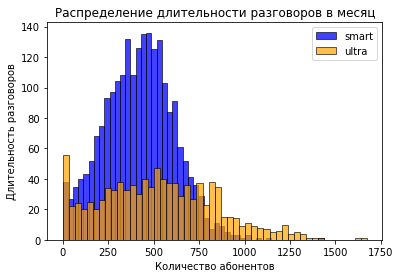

In [45]:
#Сравниваем распределения длительности разговоров в месяц по тарифам.
ax = sns.histplot(smart['duration'], bins = 50, color = 'blue')
sns.histplot(ultra['duration'], bins = 50, color="orange", alpha = 0.7)
plt.title('Распределение длительности разговоров в месяц')
ax.set(xlabel='Количество абонентов', ylabel='Длительность разговоров')
ax.legend(['smart', 'ultra'])
plt.show()

Средняя продлжительность разговоров в месяц среди пользователей тарифа ultra распределена нормально со средним 526.623, дисперсией 100873.633 и стандартным отклонением 317.606.
Существует значительное количество абонентов, не совершавших разговоров в течение отдельных месяцев. Это отразилось в виде высокого столбца со значением 0. Распределение длительности разговоров близко к нормальному, но несколько скошено вправо. Согласно правилу трёх сигм, продолжительность разговоров свыше 1404 минут в месяц можно считать выбросом. Это очень важно, с учётом того, что тариф включает в себя 3000 оплаченных минут разговора в месяц.

Средняя продолжительность разговоров для пользователей тарифа smart распределена нормально со средним 417.934, дисперсией 36219.315 и стандартным отклонением 190.313. С учётом того, что тариф предоставляет 500 минут разговора в месяц, средний пользователь тарифа не использует пакет звонков полностью. Максимальной длительностью разговоров для этой группы абонентов согласно правилу трёх сигм можно считать 989 минут. Всё что больше (до 1400 митнут) - составляет выброс.

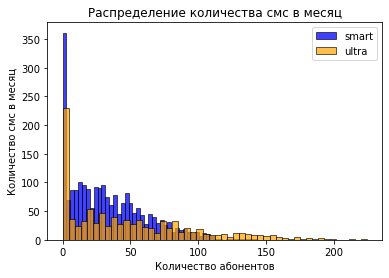

In [46]:
#Сравниваем распределения количества смс в месяц по тарифам.
ax = sns.histplot(smart['message_number'], bins = 50, color = 'blue')
sns.histplot(ultra['message_number'], bins = 50, color="orange", alpha = 0.7)
plt.title('Распределение количества смс в месяц')
ax.set(xlabel='Количество абонентов', ylabel='Количество смс в месяц')
ax.legend(['smart', 'ultra'])
plt.show()

Количество смс, отправленных в месяц одним абонентом в месяц среди пользователей тарифа ultra распределено нормально (данные положительно скошены) со средним 49.363, дисперсией 2285.266 и стандартным отклонением 47.804.
Правый столбец диаграммы показывает, что более четверти пользователей тарифа ultra не пользуются смс. Подавляющее большинство их отправляет не более 200 смс в месяц. В то же время тариф прдлагает 1000 оплаченных смс в месяц.

Количество смс, отправленных пользователями тарифа smart распределена нормально (данные положительно скошены) со средним 33.384, дисперсией 796.812 и стандартным отклонением 28.228.
Столбец слева показывает, как и в случае с тарифом ultra, большое количество абонентов, не пользовавшихся смс (не менее 16% от общего количества пользователей тарифа smart). Среднее количество смс, отправляемых в месяц по этому тарифу - 33-34. В соответствии с правилом трёх сигм, основная масса абонентов, пользующихся тарифом smart,  отправляет не более 85 смс в месяц, при включенных в тариф 50 смс в месяц. Таким образом, часть абонентов приносит оператору дополнительную прибыль.

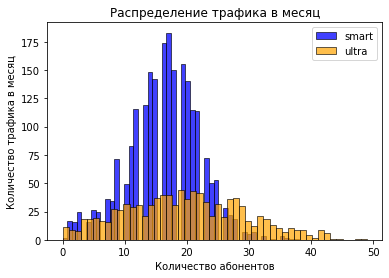

In [47]:
#Сравниваем распределения интернет-трафика в месяц по тарифам.
ax = sns.histplot(smart['gb_used'], bins = 50, color = 'blue')
sns.histplot(ultra['gb_used'], bins = 50, color="orange", alpha = 0.7)
plt.title('Распределение трафика в месяц')
ax.set(xlabel='Количество абонентов', ylabel='Количество трафика в месяц')
ax.legend(['smart', 'ultra'])
plt.show()

Количество гигабайт интернет-трафика, использованного в месяц среди пользователей тарифа ultra распределена нормально со средним 19.494, дисперсией 97.091 и стандартным отклонением 9.853. 
Около половины абонентов используют трафик больше среднего значения. Объём трафика, использованного за месяц доходит до 49 гб. То есть, значительная часть пользователей превышает предоставленный тарифом лимит в 30 гб.

Количество интернет-трафика пользователей тарифа smart распределено нормально со средним 16.329, дисперсией 33.029 и стандартным отклонением 5.747.
Средний объём использованного трафика по тарифу smart составил 16.33 Гб. Осномная масса абонентов использовала в месяц не более 33.55 Гб. в месяц, при том, что тариф предоставляет только 15 Гб. трафика в месяц. Не менее половины пользователей тарифа smart доплачивают за интернет сверх тарифа.
В целом, можно говорить, что для обоих тарифов свойственны общие тенденции как в использовании звонков (средний абонент не использует все минуты разговора),
так и в использовании смс (значительное количество абонентов не пользуется смс вовсе, и в среднем эта услуга не очень популярна, а использование смс сверх тарифа в smart происходит только за счёт очень малого количества смс, включённых в тариф)
и так же в использовании интернет-трафика (абоненты в обоих случаях активно пользуются интернетом и часто платят за дополнительный трафик).

In [48]:
monthly_revenue_ultra = ultra['monthly_revenue'].mean()
display(monthly_revenue_ultra)
variance_monthly_revenue_ultra = np.var(ultra['monthly_revenue'], ddof = 1)
display(variance_monthly_revenue_ultra)
standard_deviation_monthly_revenue_ultra = np.sqrt(variance_monthly_revenue_ultra)
display(standard_deviation_monthly_revenue_ultra)

2070.1522842639592

141516.74507861698

376.1871144505311

Оценочное среднее месячного дохода от каждого пользователя с тарифом ultra равно 2070.15. Дисперсия оценочно равна 141516.75. Стандартное отклонение составляет 376.19. Таким образом, основная масса пользователей тарифа ultra платит до 3198.72 рублей в месяц. Всё, что выше можно считать выбросом.

In [49]:
#Находим статистики помесячного дохода для пользователей тарифа ultra.
monthly_revenue_smart = smart['monthly_revenue'].mean()
display(monthly_revenue_smart)
variance_monthly_revenue_smart = np.var(smart['monthly_revenue'], ddof = 1)
display(variance_monthly_revenue_smart)
standard_deviation_monthly_revenue_smart = np.sqrt(variance_monthly_revenue_smart)
display(standard_deviation_monthly_revenue_smart)

1289.9735307312696

669785.7080064153

818.4043670499415

Оценочное среднее месячного дохода от каждого пользователя с тарифом smart равно 1289.97. Дисперсия оценочно равна 669785.71. Стандартное отклонение составляет 818.4. Таким образом, основная масса пользователей тарифа smart платит до 3745.17 рублей в месяц. Всё, что выше можно считать выбросом.

Text(0, 0.5, 'Рубли')

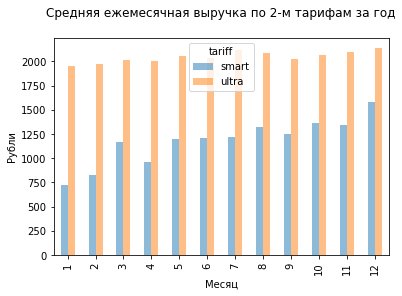

In [50]:
#Сравниваем среднюю выручку с одного пользователя в месяц по тарифам.
result_table_tariffs.pivot_table(index='tariff', columns='months', values='monthly_revenue', aggfunc='mean').T.plot(kind='bar', alpha=0.5)
plt.title('Средняя ежемесячная выручка по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли')

Выручка от тарифа ultra всегда заметно больше, чем от тарифа smart. Если выручка от тарифа ultra всегда в течение года распределена более или менее равномерно, то выручка от тарифа smart в течение года имеет тенденцию к росту.

## Проверка гипотез.<a id="hypothesis_testing"></a>

### Первая гипотеза.

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличаются.
Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» отличаются.
Нулевая гипотеза должна быть сформулирована, чтобы в ней присутствовал знак "=". Альтернативная сформулирована так, чтобы протитворечить нулевой.

In [51]:
#Проверяем гипотезу
sample1 = ultra['monthly_revenue']
sample2 = smart['monthly_revenue']

alpha = .05

results = st.ttest_ind(sample1, sample2)

display('Средний месячный доход от одного пользователя тарифа ultra:', ultra['monthly_revenue'].mean())
display('Средний месячный доход от одного пользователя тарифа smart:', smart['monthly_revenue'].mean())

display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'Средний месячный доход от одного пользователя тарифа ultra:'

2070.1522842639592

'Средний месячный доход от одного пользователя тарифа smart:'

1289.9735307312696

'p-значение:'

1.4229814360764067e-160

'Отвергаем нулевую гипотезу'

Гипотеза о равенстве средней выручки пользователей тарифов ultra и smart отвергнута. Дополнительные расчёты показывают, что средняя выручка абонентов, пользующихся тарифом ultra в 1.6 раза больше, чем средняя выручка абонентов, пользующихся тарифом smart.
Если бы критический уровень статистической значимости был равен 0.01, результат был бы тот же.

In [52]:
# Строим таблицу, содержащую данные абонентов из Москвы
Moscow_customers = result_table_tariffs[result_table_tariffs['city'] == 'Москва']
display(Moscow_customers.head())

#Строим таблицу, содержащую данные абонентов из регионов
regions_customers = result_table_tariffs[result_table_tariffs['city'] != 'Москва']
display(regions_customers)

,user_id,months,duration,call_number,gb_used,message_number,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
8,1001,11,430.0,59.0,18.0,0.0,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15.0,500,550,200,3,3,1150.0
9,1001,12,414.0,63.0,14.0,0.0,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15.0,500,550,200,3,3,550.0
17,1003,8,380.0,55.0,9.0,37.0,23,NaT,Москва,Белла,...,2018-08-17,ultra,1000,30.0,3000,1950,150,1,1,1950.0
18,1003,9,961.0,134.0,13.0,91.0,23,NaT,Москва,Белла,...,2018-08-17,ultra,1000,30.0,3000,1950,150,1,1,1950.0
19,1003,10,855.0,108.0,15.0,83.0,23,NaT,Москва,Белла,...,2018-08-17,ultra,1000,30.0,3000,1950,150,1,1,1950.0


,user_id,months,duration,call_number,gb_used,message_number,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000,5,159.0,22.0,3.0,22.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,6,172.0,43.0,23.0,60.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,7,340.0,47.0,14.0,75.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,8,408.0,52.0,14.0,81.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,9,466.0,58.0,15.0,57.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11.0,17.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,550.0
3210,1489,9,0.0,0.0,17.0,32.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,950.0
3211,1489,10,0.0,0.0,20.0,21.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,1550.0
3212,1489,11,0.0,0.0,18.0,20.0,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15.0,500,550,200,3,3,1150.0


### Вторая гипотеза.

Нулевая гипотеза: средняя выручка пользователей из Москвы и регионов не отличаются.
Альтернативная гипотеза: средняя выручка пользователей из Москвы и регионов отличаются.
Нулевая гипотеза должна быть сформулирована, чтобы в ней присутствовал знак "=". Альтернативная сформулирована так, чтобы протитворечить нулевой.

In [53]:
#Проверяем гипотезу
sample1 = Moscow_customers['monthly_revenue']
sample2 = regions_customers['monthly_revenue']

alpha = .05

results = st.ttest_ind(sample1, sample2)

display(Moscow_customers['monthly_revenue'].mean())
display(regions_customers['monthly_revenue'].mean())

display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

1546.7135842880523

1524.9362274298885

'p-значение:'

0.5440152911670224

'Не получилось отвергнуть нулевую гипотезу'

Гипотезу о равенстве средней выручки пользователей из Москвы и из регионов отвергнуть не удалось. Дополнительные расчёты показывают, что средняя выручка абонентов из регионов составляет 98.59% от средней выручки, полученной от пользователя-москвича.

## Общий вывод.

1. Средняя продлжительность разговоров в месяц среди пользователей тарифа ultra составляет в среднем 526.623 минуты.
Существует значительное количество абонентов, не совершавших разговоров в течение отдельных месяцев. Это отразилось в виде высокого столбца со значением 0. Согласно правилу трёх сигм, продолжительность разговоров свыше 1404 минут в месяц можно считать выбросом. Это очень важно, с учётом того, что тариф включает в себя 3000 оплаченных минут разговора в месяц.

2. Количество смс, отправленных в месяц одним абонентом в месяц среди пользователей тарифа ultra в среднем составляет 49.363. Стандартное отклонение составило 47.804, следовательно, подавляющее большинство их отправляет не более 200 смс в месяц. В то время как тариф прелагает 1000 оплаченных смс в месяц.
Правый столбец диаграммы показывает, что более четверти пользователей тарифа ultra не пользуются смс.  

3. Объём интернет-трафика, использованного в месяц среди пользователей тарифа ultra в среднем равен 19.494 Гб. Стандартное отклонение составляет  9.853 Гб. Таким образом, объём трафика, использованного за месяц доходит до 49 гб. Около половины пользователей превышают предоставленный тарифом лимит в 30 гб. 

4. Средняя продолжительность разговоров для пользователей тарифа smart равна 417.934 минут. Стандартное отклонение в 190.313 минут позволяет говорить (опираясь на правило трёх сигм) о том, что подавляющее большинство абонентов разговаривает до 989 минут в месяц. Всё что больше (до 1400 минут) - составляет выброс. С учётом того, что тариф предоставляет 500 минут разговора в месяц, средний пользователь тарифа не использует пакет звонков полностью.

5. Среднее количество смс, отправленных пользователями тарифа smart равно 33.384. Стандартное отклонение, равное 28.228, и правило трёх сигм, позволяет утверждать, что основная масса абонентов, пользующихся тарифом smart,  отправляет не более 85 смс в месяц, при включенных в тариф 50 смс в месяц. Таким образом, часть абонентов приносит оператору дополнительную прибыль.
Столбец слева показывает, как и в случае с тарифом ultra, большое количество абонентов, не пользовавшихся смс (не менее 16% от общего количества пользователей тарифа smart). 

6. Количество интернет-трафика пользователей тарифа smart в среднем равно 16.329 Гб. Стандартное отклонение в 5.747 Гб. и правило трёх сигм позволяют говорить о том, что осномная масса абонентов использовала в месяц до 33.55 Гб. в месяц, при том, что тариф предоставляет только 15 Гб. трафика в месяц. Не менее половины пользователей тарифа smart доплачивают за интернет сверх тарифа.

7. В целом, можно говорить, что для обоих тарифов свойственны общие тенденции как в использовании звонков (средний абонент не использует все минуты разговора),
так и в использовании смс (значительное количество абонентов не пользуется смс вовсе, и в среднем эта услуга не очень популярна, а использование смс сверх тарифа в smart происходит только за счёт очень малого количества смс, включённых в тариф)
и так же в использовании интернет-трафика (абоненты в обоих случаях активно пользуются интернетом и часто платят за дополнительный трафик).

8. Гипотеза о равенстве средней выручки пользователей тарифов ultra и smart отвергнута. Дополнительные расчёты показывают, что средняя выручка абонентов, пользующихся тарифом ultra в 1.6 раза больше, чем средняя выручка абонентов, пользующихся тарифом smart.
Если бы критический уровень статистической значимости был равен 0.01, результат был бы тот же.

9. Гипотезу о равенстве средней выручки пользователей из Москвы и из регионов отвергнуть не удалось. Дополнительные расчёты показывают, что средняя выручка абонентов из регионов составляет 98.59% от средней выручки, полученной от пользователя-москвича.

10. Оценочное среднее месячного дохода от каждого пользователя с тарифом ultra равно 2070.15. Стандартное отклонение составляет 376.19. Таким образом, основная масса пользователей тарифа ultra платит до 3198.72 рублей в месяц.

11. Оценочное среднее месячного дохода от каждого пользователя с тарифом smart равно 1289.97. Стандартное отклонение составляет 818.4. Таким образом, основная масса пользователей тарифа smart платит до 3745.17 рублей в месяц.

12. Выручка от тарифа ultra всегда заметно больше, чем от тарифа smart. Если выручка от тарифа ultra всегда в течение года распределена более или менее равномерно, то выручка от тарифа smart в течение года имеет тенденцию к росту.

Таким, образом, для компании мегалайн самым выгодным тарифом является ultra. Делать акцент на работе с пользователями из Москвы или из регионов нет необходимости, поскольку доходы компании по этому критерию не отличаются.